In [1]:
import numpy as np
import utils
from env import Maze
from agent import QAgent

%load_ext autoreload
%autoreload 2

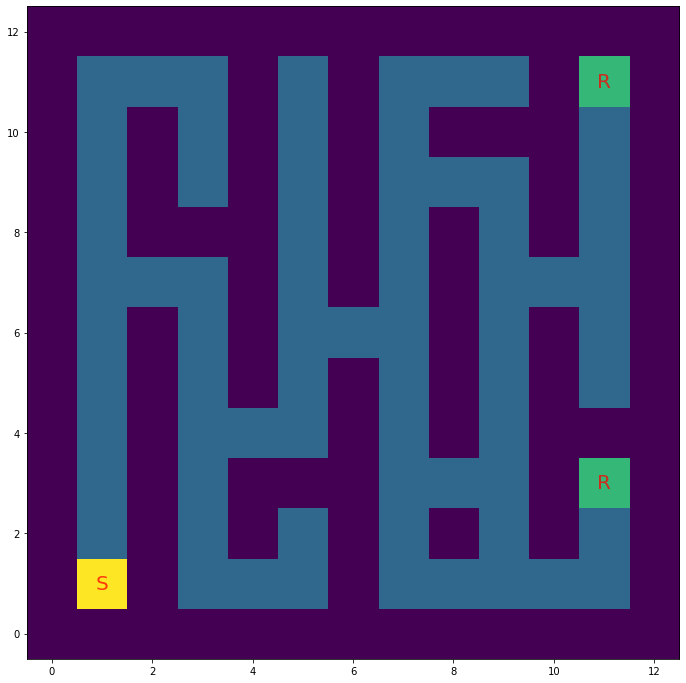

In [16]:
#Set up environment

width = 13

height = 13 #Random collaboration

start_state = (1, 1)

reward_states = [(11, 11), (3, 11)]

rewards = [10, 5]

walls = [*[(wall, 0) for wall in range(13)],
         *[(wall, 12) for wall in range(13)],
         *[(0, wall) for wall in range(13)],
         *[(12, wall) for wall in range(13)],
         *[(wall, 2) for wall in range(7)], 
         *[(wall, 2) for wall in range(8, 11)],
         (8,3),
         *[(wall, 4) for wall in range(5, 12)],
         *[(wall, 4) for wall in range(2, 4)],
         (3,5),
         *[(wall, 6) for wall in range(6)],
         *[(wall, 6) for wall in range(7, 12)],
         (2, 8),
         *[(wall, 8) for wall in range(4, 9)],
         (10,8),
         (10,9),
         *[(wall, 10) for wall in range(8, 12)],
         *[(wall, 10) for wall in range(2, 7)],
         (4, 11)
        ]

utils.plot((height, width), walls, start_state, reward_states)




In [17]:
env_info={
    'width':width,
    'height':height,
    'walls': walls,
    'start_state':start_state,
    'reward_states':reward_states,
    'rewards':rewards
}

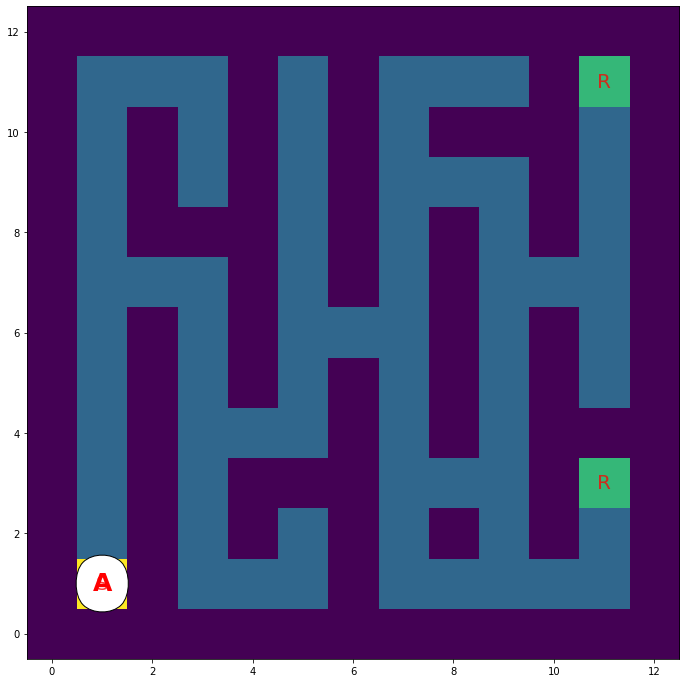

In [18]:
env = Maze()

env.env_init(env_info)

env.env_start()

env.env_plot()

In [11]:
def test_agent(env, agent, env_info, agent_info, num_steps):
    
    #Initilize the environment
    env = env()
    env.env_init(env_info)
    
    agent = agent()
    agent.agent_init(agent_info)
    
    observation = env.env_start()
    
    action = agent.agent_start(observation[1])
    
    for step in range(num_steps):
        observation = env.env_step(action)
        
        if observation[2]:
            agent.agent_stop(observation[0], observation[1])
            
        else:
            action = agent.agent_step(observation[0], observation[1])
            
        if action==0:
            action_string = 'up'
        elif action==1:
            action_string = 'right'
        elif action==2:
            action_string = 'down'
        elif action==3:
            action_string = 'left'
            
        
        env.env_plot()
        print(f"Action {action_string}")
        
    return env, agent

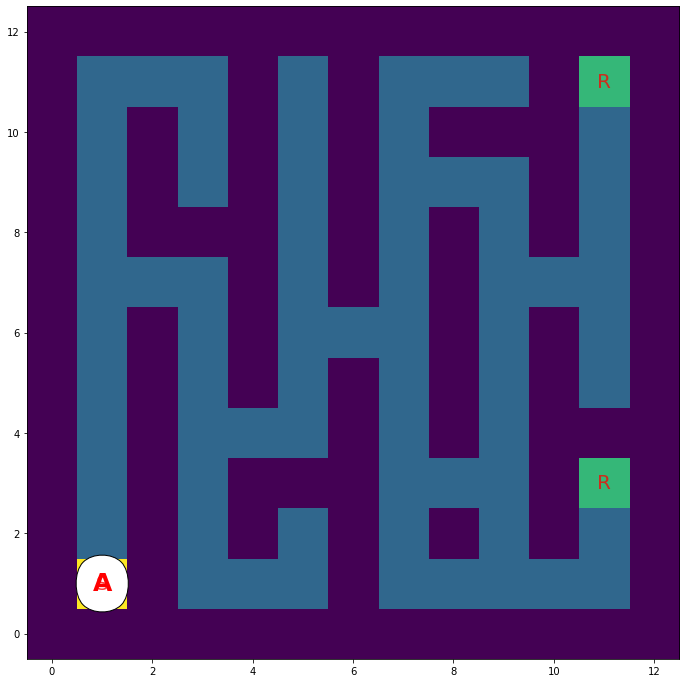

Action down


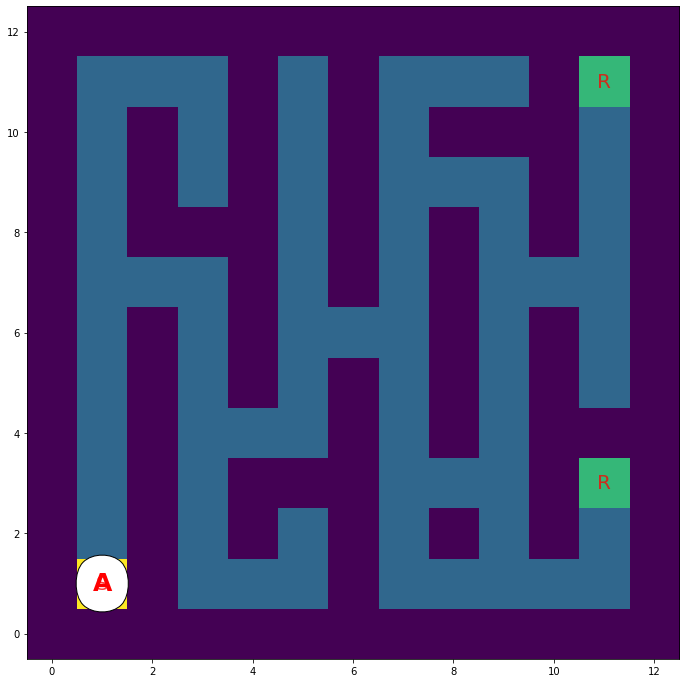

Action down


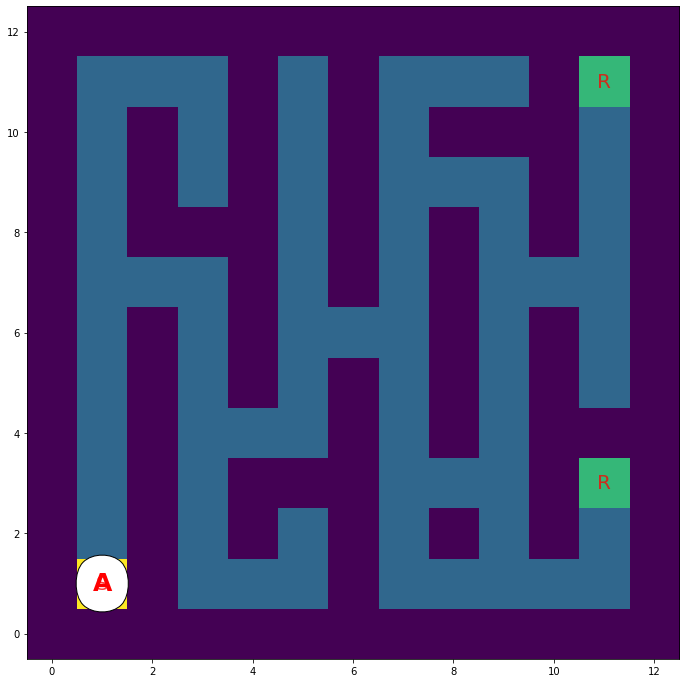

Action down


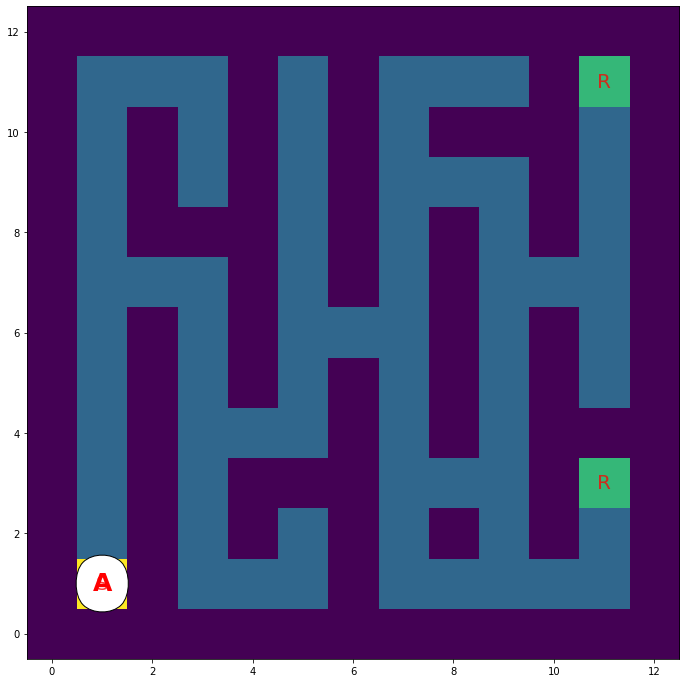

Action up


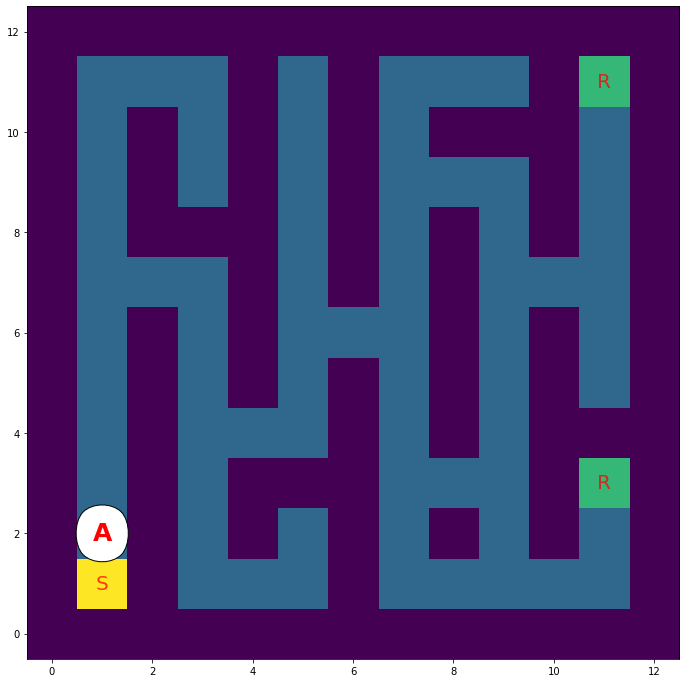

Action up


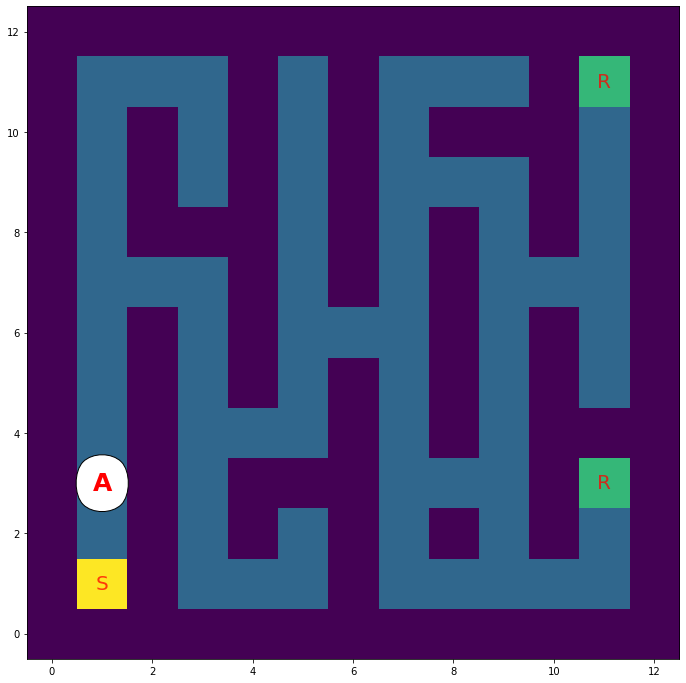

Action down


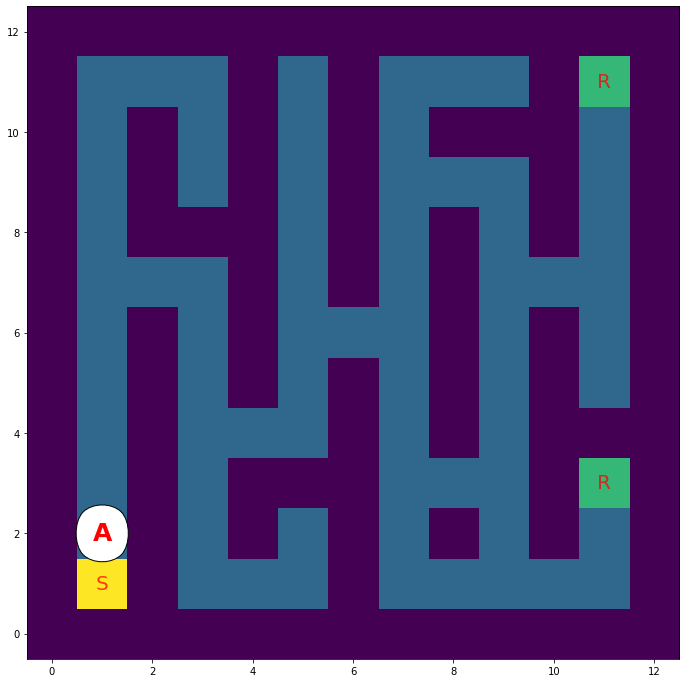

Action left


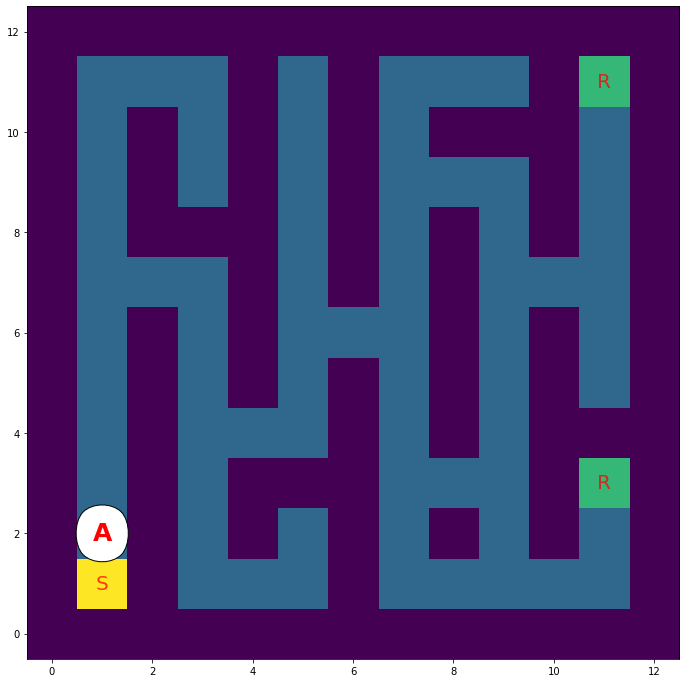

Action up


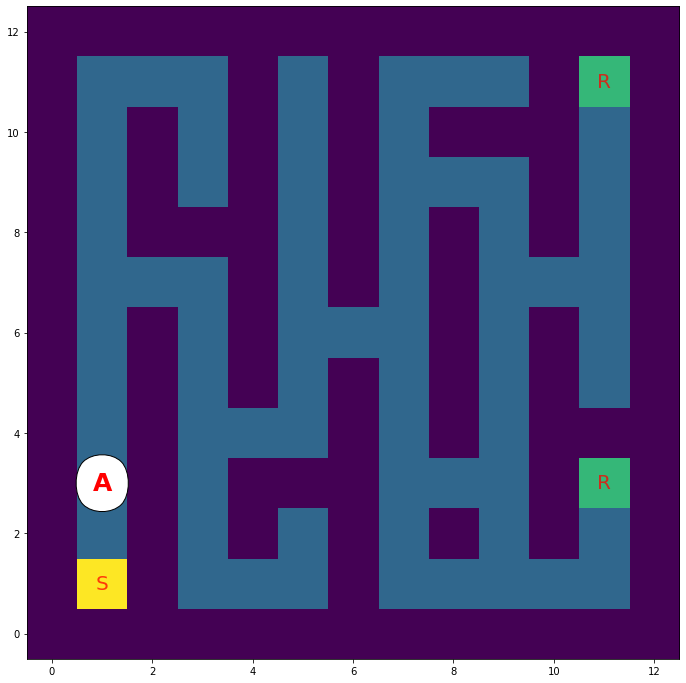

Action up


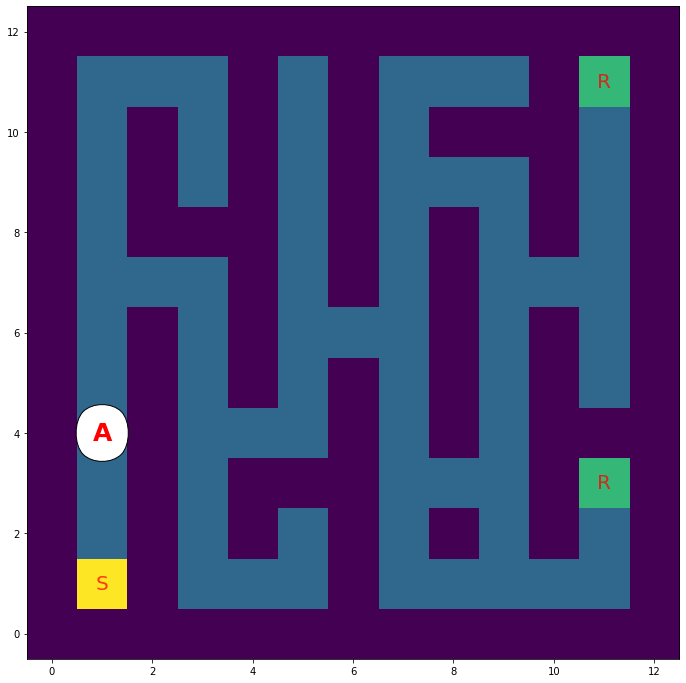

Action right


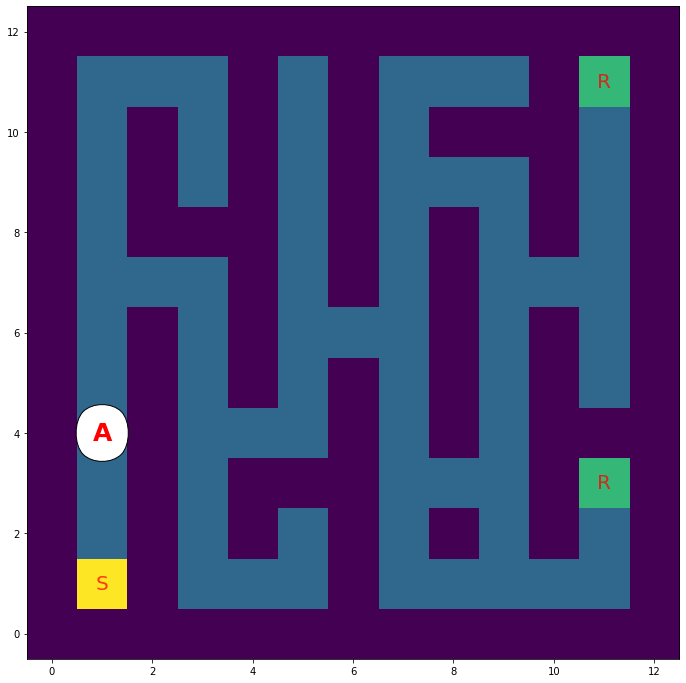

Action down


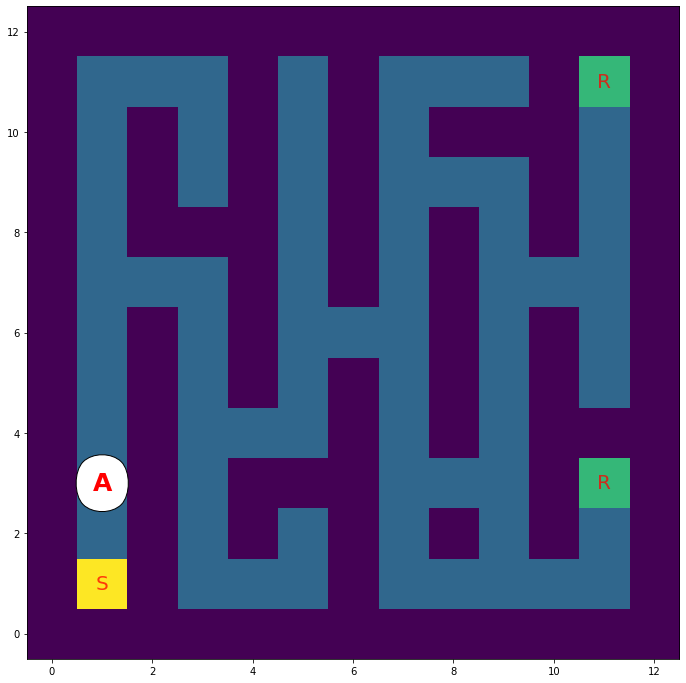

Action up


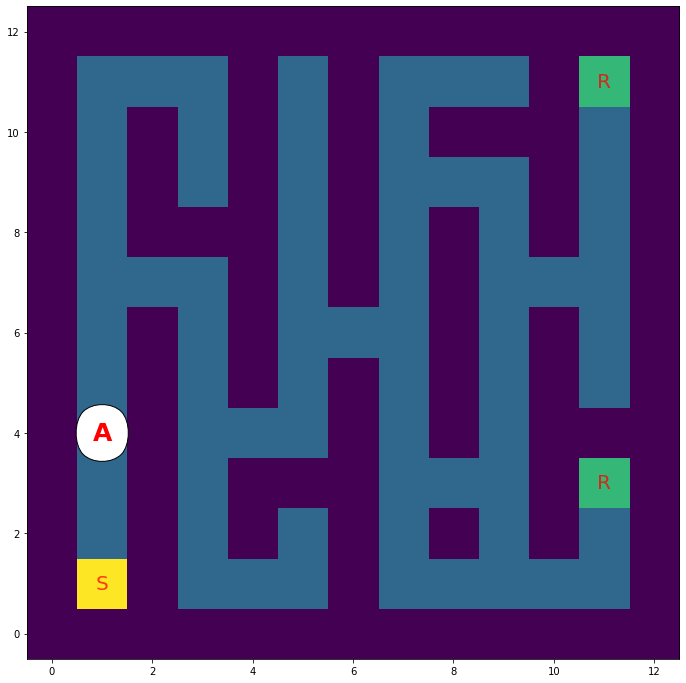

Action up


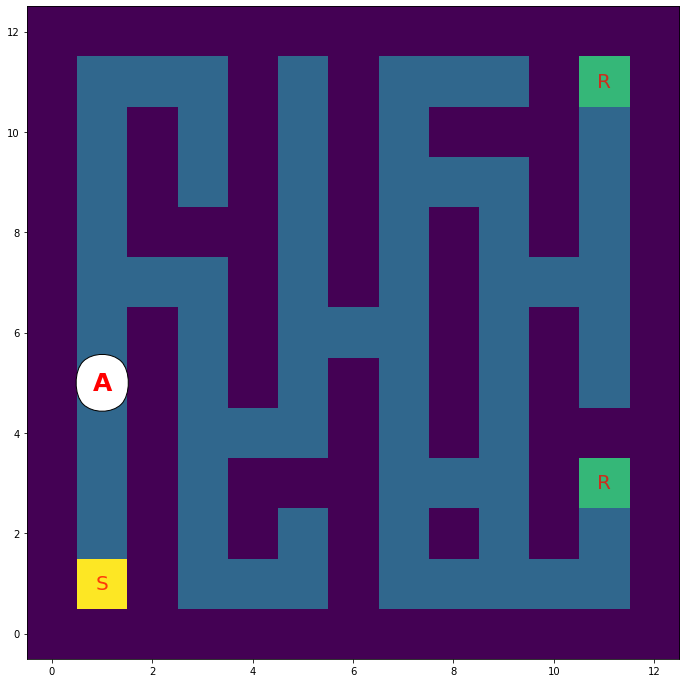

Action up


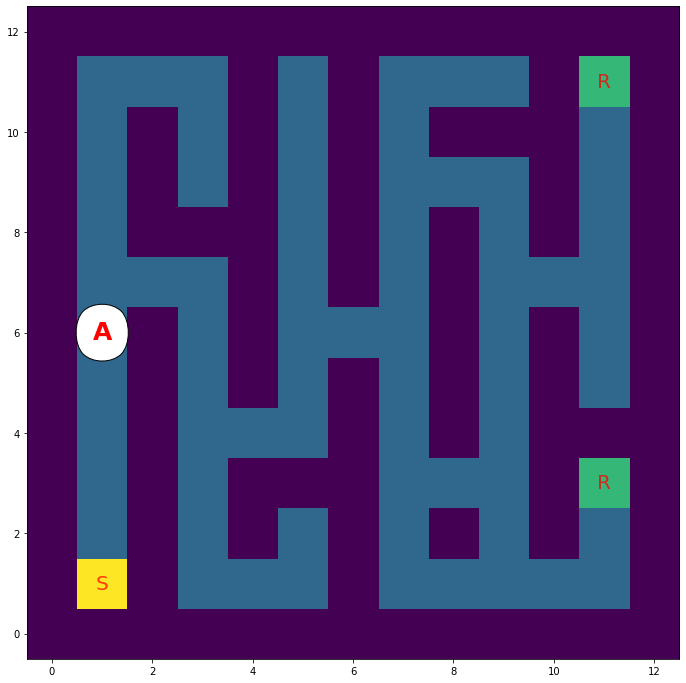

Action up


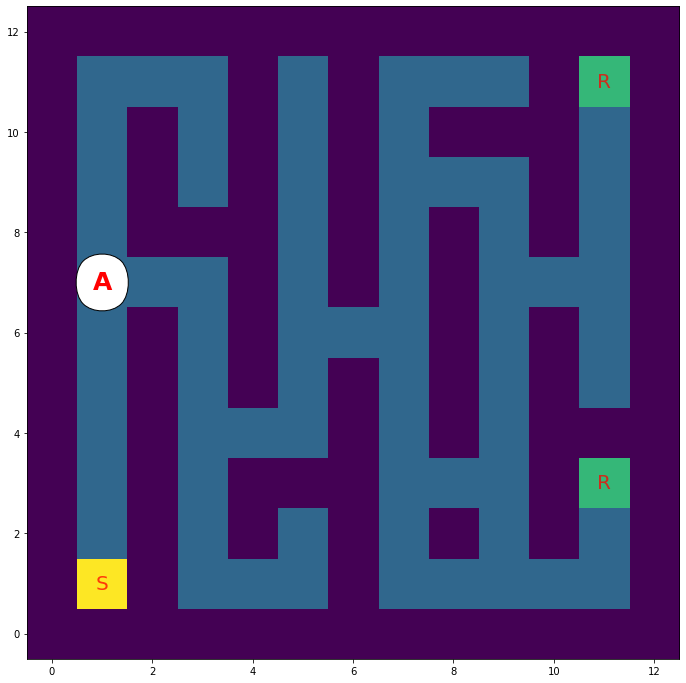

Action left


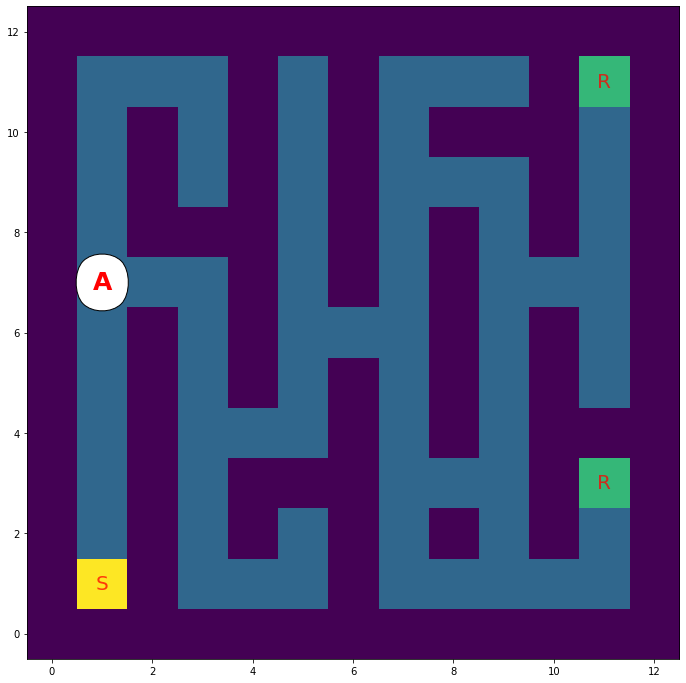

Action right


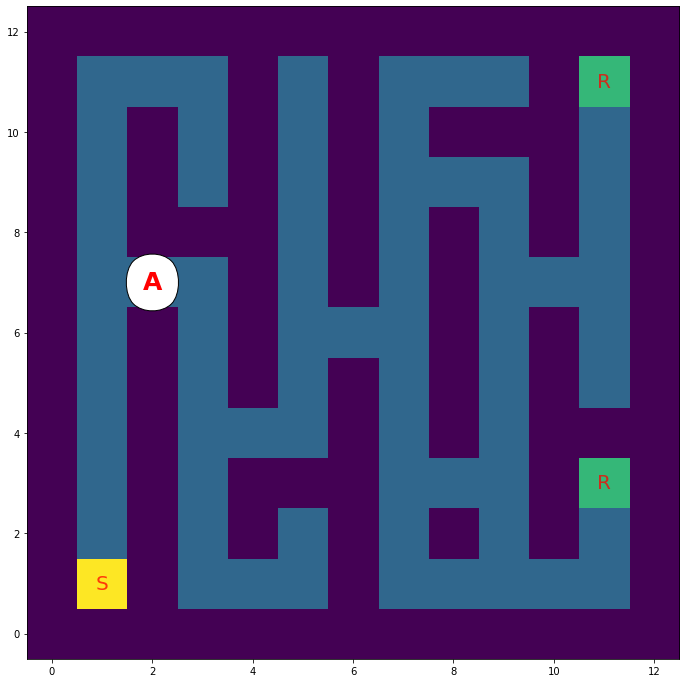

Action down


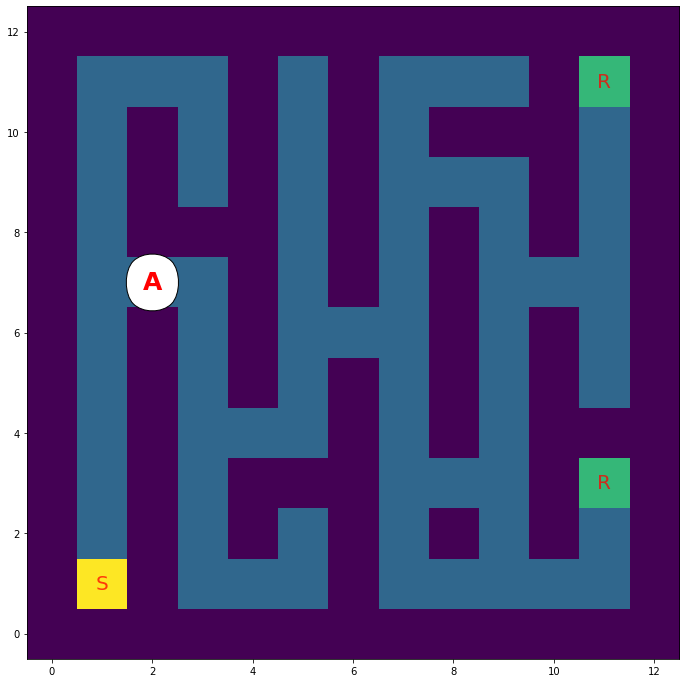

Action right


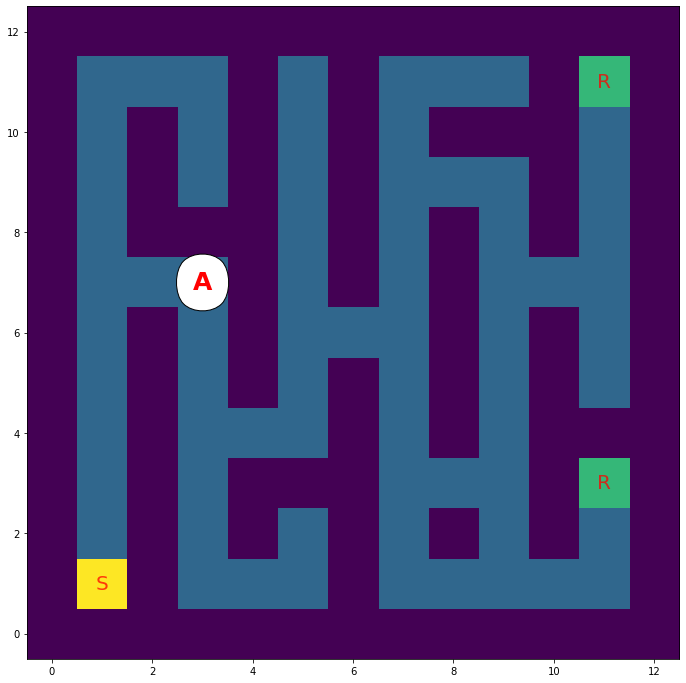

Action down


In [14]:
agent_info = {
    'num_states':width*height,
    'num_actions':4,
    'step_size':0.5,
    'discount_factor':0.9,
    'epsilon':0.05,
}

env, agent = test_agent(Maze, QAgent, env_info, agent_info, 20)